Total images per class before splitting:
diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64

Images per class after splitting:
Training Set:
 diagnosis
0    1444
2     799
1     296
4     236
3     154
Name: count, dtype: int64

Validation Set:
 diagnosis
0    180
2    100
1     37
4     29
3     20
Name: count, dtype: int64

Test Set:
 diagnosis
0    181
2    100
1     37
4     30
3     19
Name: count, dtype: int64
Found 2929 validated image filenames.
Found 366 validated image filenames.
Found 367 validated image filenames.
Visualizing 2 preprocessed images...
Found 1 validated image filenames.
Displaying Image 1 in Real Sizes


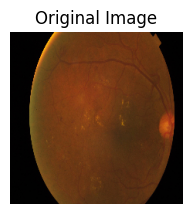

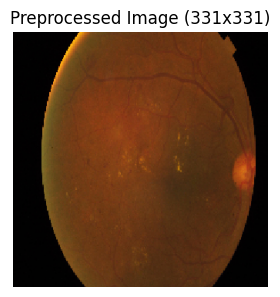

Image 1:
  - MSE: 0.0000


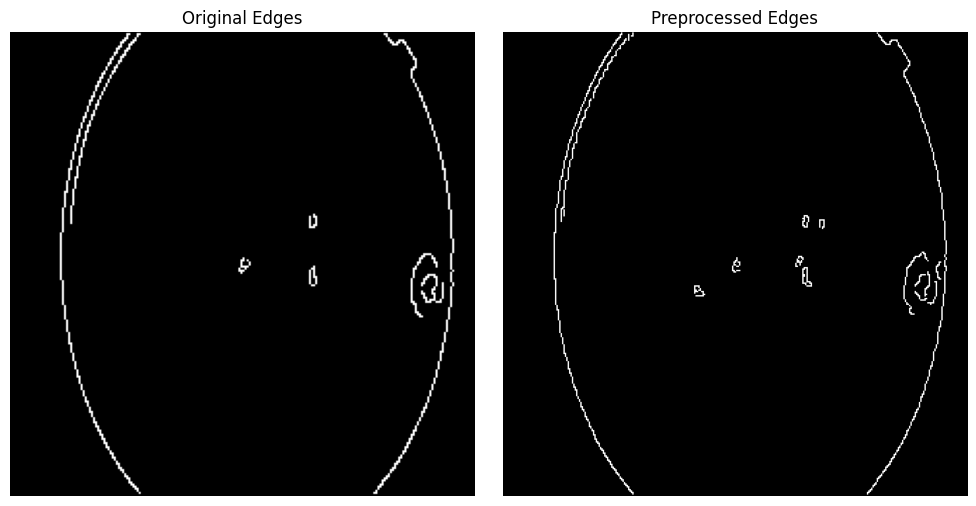

Found 1 validated image filenames.
Displaying Image 2 in Real Sizes


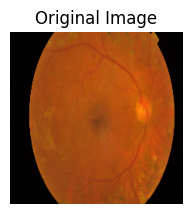

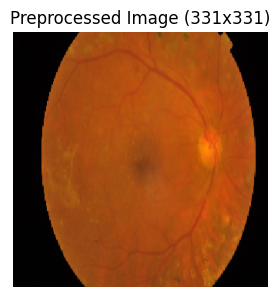

Image 2:
  - MSE: 0.0000


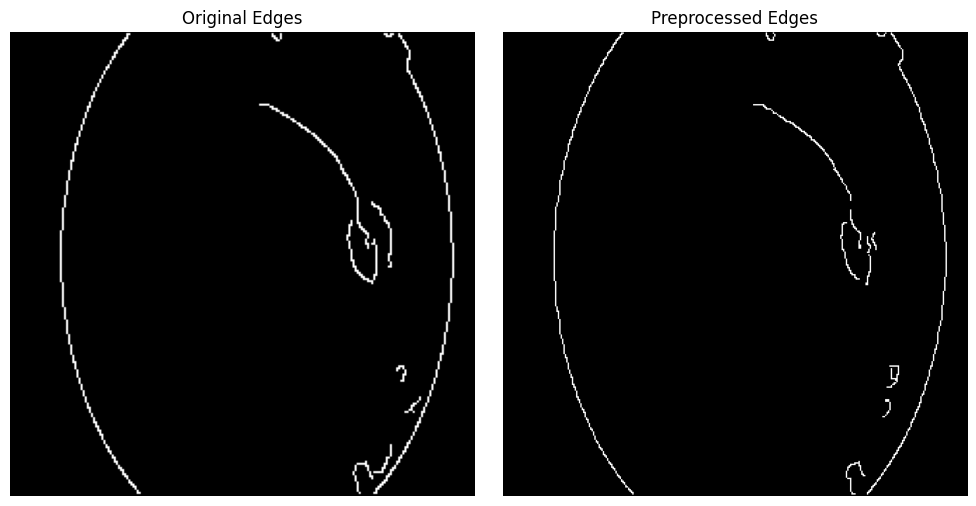

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ nasnet_large (Functional)            │ (None, 11, 11, 4032)        │      84,916,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 4032)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         516,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,433,687 (325.90 MB)

 Trainable params: 85,237,019 (325.15 MB)

 Non-trainable params: 196,668 (768.23 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.6395 - loss: 1.1568 - val_accuracy: 0.2732 - val_loss: 5287.6489
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 209s 565ms/step - accuracy: 0.6978 - loss: 0.8784 - val_accuracy: 0.2732 - val_loss: 904.6531
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 208s 564ms/step - accuracy: 0.7179 - loss: 0.8322 - val_accuracy: 0.4918 - val_loss: 15527.8262
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 211s 571ms/step - accuracy: 0.7245 - loss: 0.7822 - val_accuracy: 0.1011 - val_loss: 4273024512.0000
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 208s 564ms/step - accuracy: 0.7147 - loss: 0.8121 - val_accuracy: 0.1011 - val_loss: 2704171.2500
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 208s 562ms/step - accuracy: 0.7097 - loss: 0.8217 - val_accuracy: 0.4918 - val_loss: 2454192.0000
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 208s 564ms/step - accuracy: 0.7454 - loss: 0.7151 - val_accuracy: 0.4918 - val_loss: 68745.6484
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 208s 564ms/step 

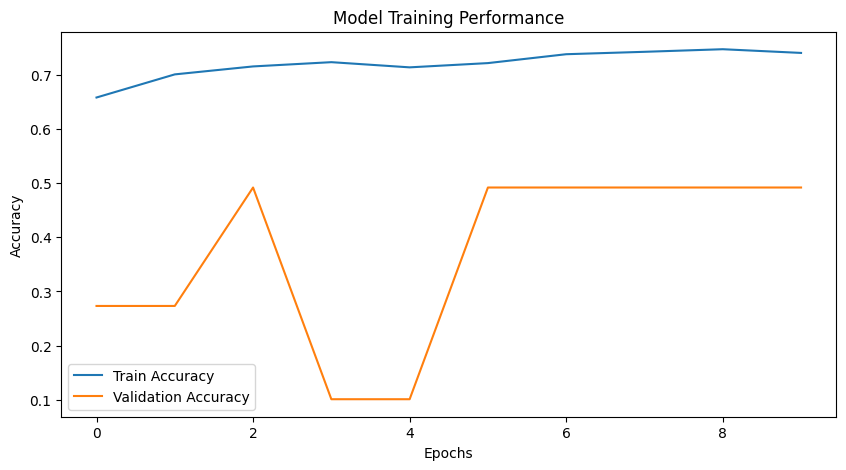

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Predicted Class for /kaggle/input/dataset3/archive2/colored_images/0a74c92e287c.png: 0


In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import canny
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import time

# Step 1: Set File Paths for Kaggle
csv_path = "/kaggle/input/dataset3/archive2/train.csv"  # CSV file with image IDs & classes
image_folder = "/kaggle/input/dataset3/archive2/colored_images"  # Folder containing all images

# Step 2: Load Dataset
df = pd.read_csv(csv_path)
df['Image_Path'] = df['id_code'].apply(lambda x: os.path.join(image_folder, x + ".png")) # Map IDs to paths

# Display total images per class before splitting
print("Total images per class before splitting:")
print(df['diagnosis'].value_counts())

# Step 3: Split Dataset into Train, Validation & Test Sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['diagnosis'])

# Display total images per class after splitting
print("\nImages per class after splitting:")
print("Training Set:\n", train_df['diagnosis'].value_counts())
print("\nValidation Set:\n", val_df['diagnosis'].value_counts())
print("\nTest Set:\n", test_df['diagnosis'].value_counts())

# Step 4: Preprocessing Using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(331, 331), batch_size=8, class_mode='raw', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(331, 331), batch_size=8, class_mode='raw', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(331, 331), batch_size=8, class_mode='raw', shuffle=False
)

# Step 5: Functions for MSE 
def calculate_mse(original, resized):
    return np.mean((original - resized) ** 2)


# Step 6: Display Images in Real Size
def display_real_size(image, title):
    height, width, _ = image.shape
    dpi = 100
    figsize = (width / dpi, height / dpi)
    plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 7: Preprocess Image Using ImageDataGenerator
def preprocess_with_generator(image_path, target_size=(331, 331)):
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    temp_df = pd.DataFrame({"Image_Path": [image_path], "diagnosis": [0]})
    generator = datagen.flow_from_dataframe(
        dataframe=temp_df, x_col='Image_Path', y_col=None,
        target_size=target_size, batch_size=1, class_mode=None, shuffle=False
    )
    return next(generator)[0]

# Step 8: Visualizing Preprocessing & Metrics
def visualize_preprocessing(df, n_images=2, target_size=(331, 331)):
    print(f"Visualizing {n_images} preprocessed images...")

    for i in range(min(n_images, len(df))):
        original_image_path = df.iloc[i]['Image_Path']

        if not os.path.exists(original_image_path):
            print(f"File not found: {original_image_path}")
            continue

        original_image = tf.keras.utils.load_img(original_image_path)
        original_image_array = tf.keras.utils.img_to_array(original_image)

        preprocessed_image = preprocess_with_generator(original_image_path, target_size)

        resized_back_to_original_size = cv2.resize(preprocessed_image, (original_image_array.shape[1], original_image_array.shape[0]))

        mse_value = calculate_mse(original_image_array / 255.0, resized_back_to_original_size)
        
        print(f"Displaying Image {i + 1} in Real Sizes")
        display_real_size(original_image_array.astype('uint8'), "Original Image")
        display_real_size(preprocessed_image, "Preprocessed Image (331x331)")

        print(f"Image {i+1}:")
        print(f"  - MSE: {mse_value:.4f}")

        original_edges = canny(cv2.cvtColor(original_image_array.astype('uint8'), cv2.COLOR_RGB2GRAY))
        preprocessed_edges = canny(cv2.cvtColor(preprocessed_image.astype('float32'), cv2.COLOR_RGB2GRAY))

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_edges, cmap='gray')
        plt.title("Original Edges")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_edges, cmap='gray')
        plt.title("Preprocessed Edges")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

visualize_preprocessing(df, n_images=2, target_size=(331, 331))

# Step 9: Load NASNetLarge Model
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for DR severity
])

model.build(input_shape=(None, 331, 331, 3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 10: Train the Model and Track Time
start_time = time.time()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time
print(f"Total Training Time: {training_time:.2f} seconds")

# Step 11: Evaluate Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

# Step 12: Save the Model
model.save("/kaggle/working/nasnetlarge_model.h5")
print("Model saved successfully!")

# Step 13: Plot Training Performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Training Performance")
plt.show()

# Step 14: Predict an Image
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(331, 331))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array / 255.0, 0)

    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0])
    return predicted_class.numpy()

sample_image_path = os.path.join(image_folder, "0a74c92e287c.png")  
predicted_class = predict_image(sample_image_path)
print(f"Predicted Class for {sample_image_path}: {predicted_class}")

In [2]:
# Add after Step 11
metrics_df = pd.DataFrame({
    'Model': ['NASNetLarge'],
    'Dataset': ['Dataset3'],
    'Training_Accuracy': [history.history['accuracy'][-1]],
    'Validation_Accuracy': [history.history['val_accuracy'][-1]],
    'Test_Accuracy': [test_accuracy],
    'Training_Time': [training_time]
})
metrics_df.to_csv("/kaggle/working/NASNetLarge_Dataset3_metrics.csv", index=False)